# IRIS Flower Dataset

The Iris flower dataset is a classic dataset in the field of machine learning and statistical analysis, introduced by the British statistician and biologist Ronald Fisher in his 1936 paper. It consists of 150 observations of iris flowers, including the sepal and petal length and width measurements. The dataset includes three species of Iris: Iris Setosa, Iris virginica, and Iris versicolor, with 50 samples from each species. Edgar Anderson collected the data to quantify the morphological variation of Iris flowers. This dataset is widely used for teaching and experimenting with machine learning algorithms due to its simplicity and clear structure.

Features: For each flower, the dataset includes the following four features:
* Sepal length (cm)
* Sepal width (cm)
* Petal length (cm)
* Petal width (cm)
* Species


## Importing Libraries

In [29]:
import warnings
warnings.filterwarnings("ignore",category=UserWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn.metrics import accuracy_score



## Load the Dataset

In [30]:
df=pd.read_csv(r"C:\Users\alant\Downloads\iris_synthetic_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  3000 non-null   float64
 1   sepal width   3000 non-null   float64
 2   petal length  3000 non-null   float64
 3   petal width   3000 non-null   float64
 4   label         3000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 117.3+ KB


In [31]:
df.columns=df.columns.str.replace(" ","_")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  3000 non-null   float64
 1   sepal_width   3000 non-null   float64
 2   petal_length  3000 non-null   float64
 3   petal_width   3000 non-null   float64
 4   label         3000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 117.3+ KB


In [32]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
label           0
dtype: int64

In [33]:
df.drop_duplicates(inplace=True)

In [34]:
df.duplicated().sum()


0

(array([0, 1, 2, 3]),
 [Text(0, 0, 'sepal_length'),
  Text(1, 0, 'sepal_width'),
  Text(2, 0, 'petal_length'),
  Text(3, 0, 'petal_width')])

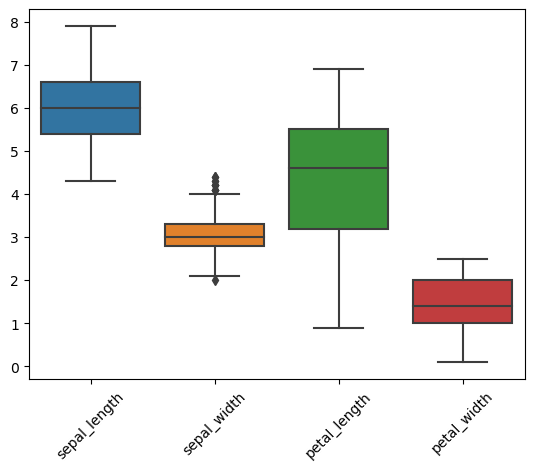

In [35]:
sns.boxplot(data=df)
plt.xticks(rotation=45)

## Boxplot

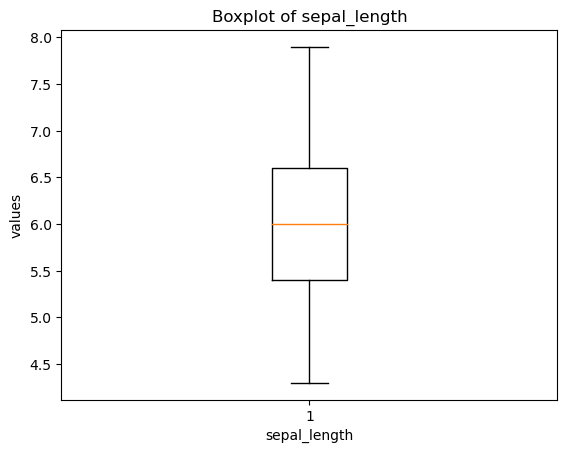

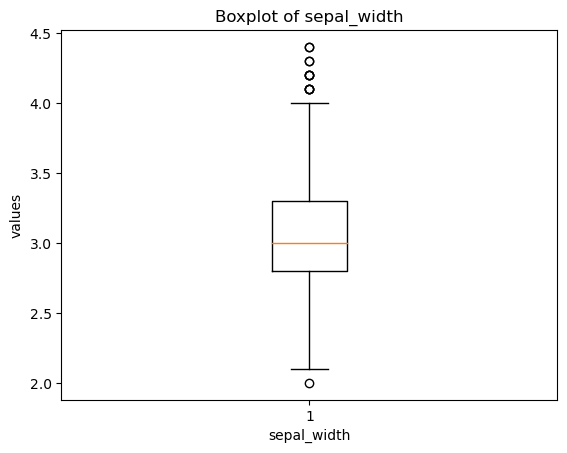

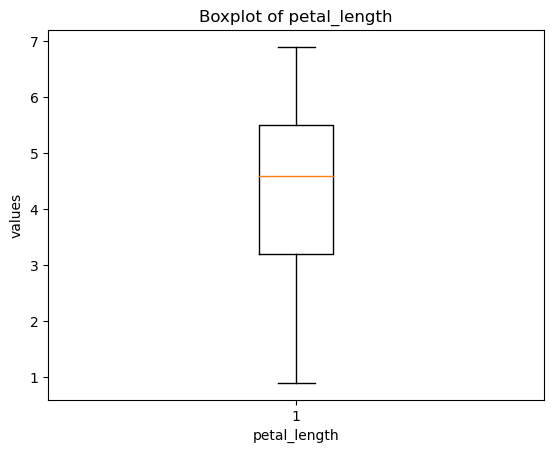

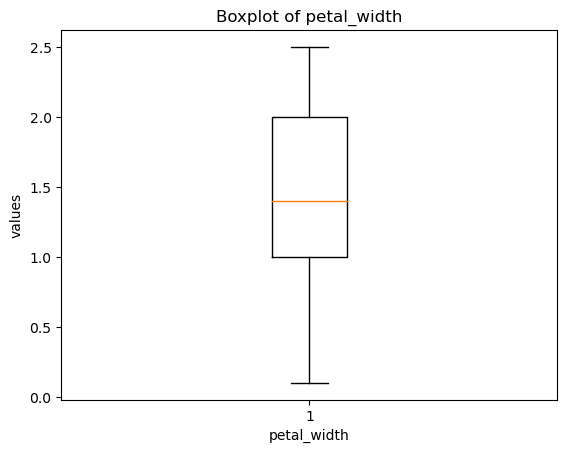

In [36]:
for i in df.select_dtypes(include='number').columns:
    plt.boxplot(data=df,x=i)
    plt.title(f"Boxplot of {i}")
    plt.xlabel(i)
    plt.ylabel("values")
    plt.show()

## Removing Outliers

In [37]:
df=df[(df['sepal_width']>2.0)& (df['sepal_width']<4.0)]

In [38]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.2,3.8,1.5,0.3,Iris-setosa
2,4.8,3.1,1.5,0.2,Iris-setosa
3,5.2,3.7,1.5,0.2,Iris-setosa
4,4.9,3.0,1.5,0.3,Iris-setosa
5,5.1,3.7,1.5,0.4,Iris-setosa


## Statistical Analysis
### 1.Describe

In [39]:
num_col=df.select_dtypes(include='number')
des=num_col.describe()
print(des)


       sepal_length  sepal_width  petal_length  petal_width
count    722.000000   722.000000    722.000000   722.000000
mean       6.040859     2.985734      4.221053     1.393075
std        0.824726     0.395262      1.643176     0.706386
min        4.300000     2.100000      0.900000     0.100000
25%        5.400000     2.700000      3.600000     1.000000
50%        6.100000     3.000000      4.600000     1.500000
75%        6.600000     3.200000      5.500000     2.000000
max        7.900000     3.900000      6.900000     2.500000


### 2.Covariance

In [40]:
covariance=num_col.cov()
print(covariance)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      0.680173    -0.010595      1.201760     0.476372
sepal_width      -0.010595     0.156232     -0.192168    -0.060487
petal_length      1.201760    -0.192168      2.700028     1.111450
petal_width       0.476372    -0.060487      1.111450     0.498981


### 3.Corelation

In [41]:
corelation=num_col.corr()
print(corelation)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.032502      0.886796     0.817701
sepal_width      -0.032502     1.000000     -0.295878    -0.216639
petal_length      0.886796    -0.295878      1.000000     0.957555
petal_width       0.817701    -0.216639      0.957555     1.000000


## Heatmap

<Axes: >

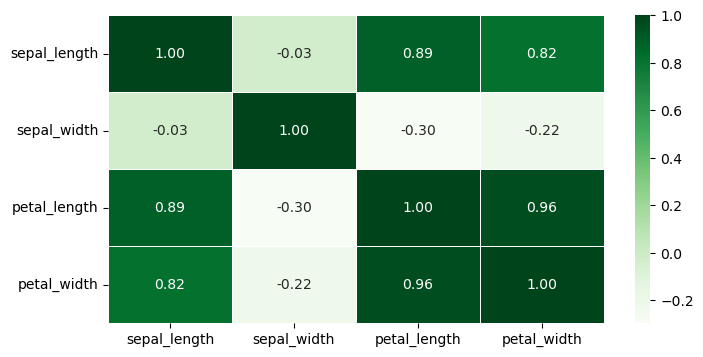

In [42]:
plt.figure(figsize=(8,4))
sns.heatmap(corelation,annot=True,cmap="Greens",linewidths=0.5,fmt=".2f")

## Seperating Dependent & Independent Variables

In [43]:
x=df.drop(columns=['label'],axis=1)
y=df['label']

In [44]:
le=LabelEncoder()
y1=le.fit_transform(y)
y1=pd.DataFrame(y)

In [45]:
df1 = df.drop(columns=['label'], axis=1)  # Remove the 'label' column
df1 = pd.concat([df1, y1], axis=1)         # Concatenate df1 and y along columns

# If you want to rename the newly added column from `y` to 'label'
df1.rename(columns={df1.columns[-1]: 'label'}, inplace=True)



## Scatterplot

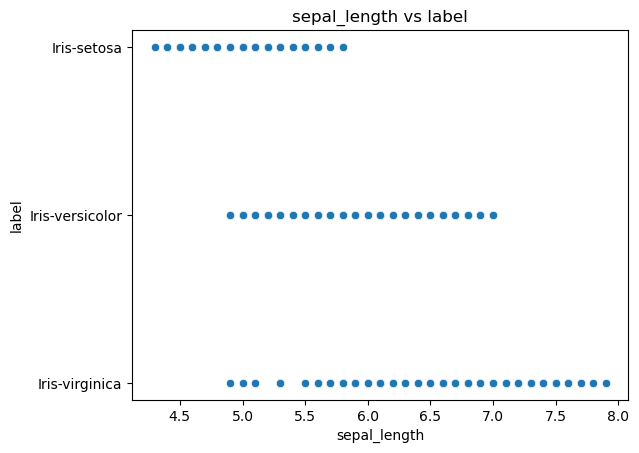

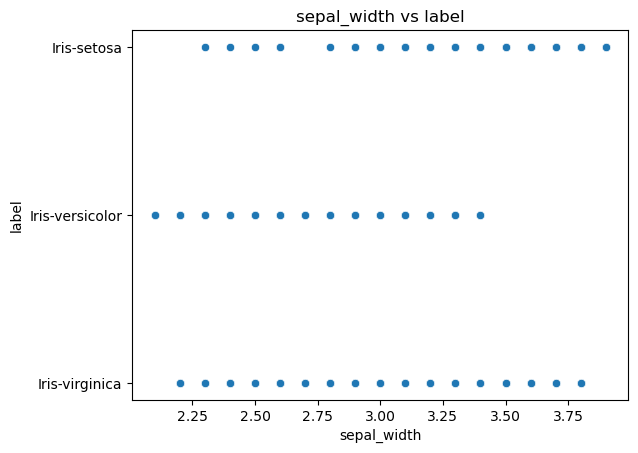

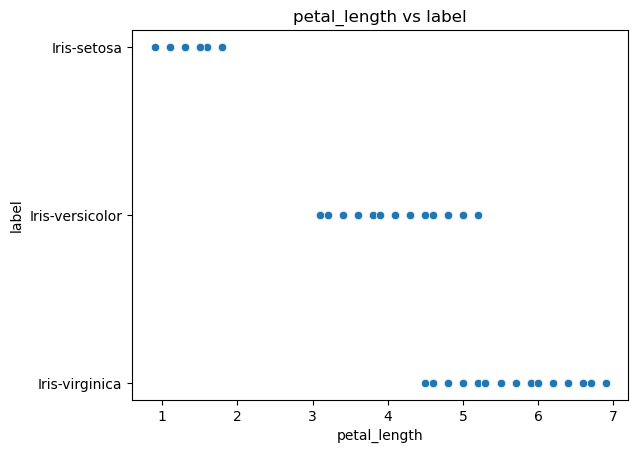

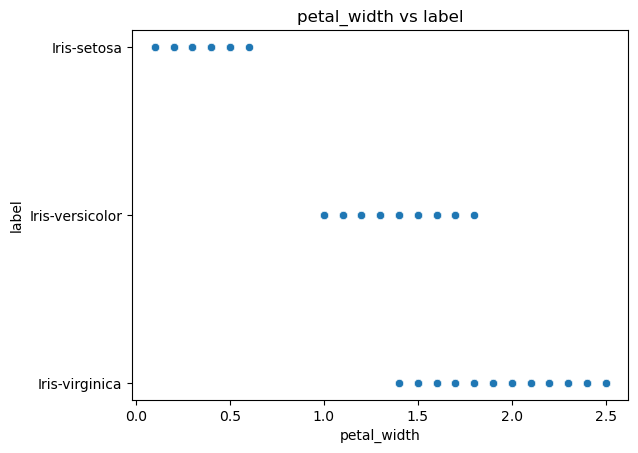

In [46]:
for i in df1.select_dtypes(include='number').columns:
    sns.scatterplot(df1,x=i,y=y)
    plt.xlabel(i)
    plt.ylabel("label")
    plt.title(f"{i} vs label")

    plt.show()

## Split the Dataset into Training & Testing

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=23)

In [48]:
stx=StandardScaler()
x_train=stx.fit_transform(x_train)
xtest=stx.fit_transform(x_test)

## Building RandomForestClassifier Model

In [49]:
cls=RandomForestClassifier(criterion='entropy',n_estimators=5)
cls.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=5)

## Predicting the Test data & Calculating Accuracy

In [50]:
y_pred=cls.predict(xtest)


In [51]:

accuracy=accuracy_score(y_test,y_pred)
print("the accuracyis:",accuracy*100,"%")

the accuracyis: 98.62068965517241 %


## Summary
The Iris dataset is a multivariate dataset that contains four features: length and width of sepals and petals, and three species of Iris: setosa, versicolor, and virginica. It is commonly used for classification tasks, including with the Random Forest algorithm.The primary purpose of this dataset is to build a classification model that can predict the species of an iris flower based on its sepal and petal measurements.It is often used for educational and demonstration purposes in machine learning and data science.

Key Features:

* Dataset Overview: The Iris dataset consists of 150 samples, with 50 samples from each of the three species. Each sample includes measurements of sepal length, sepal width, petal length, and petal width.

* Random Forest Classifier: This is an ensemble learning method that builds multiple decision trees and combines their predictions to improve accuracy and reduce overfitting. It is effective for handling complex data and providing insights into feature importance.

* Feature Importance: When applied to the Iris dataset, Random Forest can determine the importance of each feature. For instance, petal length and petal width are often found to be more important than sepal length and sepal width in distinguishing between the species.

* Model Performance: The out-of-bag score, an estimate of the classification accuracy on new data, is typically high for the Iris dataset when using Random Forest. For example, an out-of-bag score of 0.973 and a mean accuracy score of 0.933 have been reported.


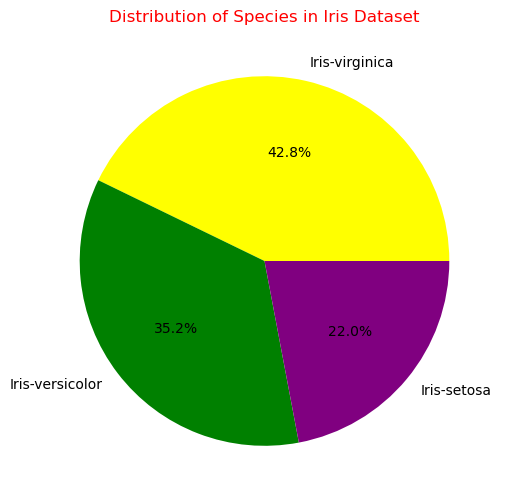

In [52]:
import matplotlib.pyplot as plt

# Count occurrences of each species
species_counts = df["label"].value_counts()

# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(species_counts, labels=species_counts.index, autopct="%1.1f%%", colors=["yellow", "green", "purple"])

# Add title
plt.title("Distribution of Species in Iris Dataset",color="red")

# Show plot
plt.show()
